In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt

# Base category for warnings triggered during the process of importing a module (ignored by default).

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\PYTHON\\ML\\titanic\\train.csv")
df.head()
# Info method is used to analayse the variable datatypes
print(df.info()) 
df.shape




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


(891, 12)

In [3]:
print(df.describe())

# describe function is used to statistic data of all varaiables in dataset(DS)
# this provide STAT detail related to nmerical columns in DS
# Count : Provide info about no of missing data in eac features/ varaiables

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


 1. Data exploration and visualization
 
For a good start, we should look at the dataset. Analyze the features and think which could be useful to predict the survival rate. The features that probably may have an influence are: the "P-class" (expect to see more survival for higher class), the "Sex" and "Age" ("women and children first"), and let's say "Embarked" also.

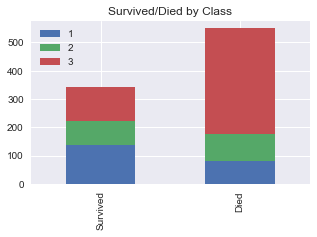

In [4]:
%matplotlib inline
import seaborn
seaborn.set() 

# to fetch the count of Survived Vs Pclass variables
surv_class = df[df['Survived']==1]['Pclass'].value_counts()
dead_class = df[df['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([surv_class, dead_class])
df_class.index=['Survived', 'Died']
df_class.plot(kind='bar',stacked=True, title="Survived/Died by Class", figsize=(5,3))
#df_class.head()

In [5]:
# display table
from IPython.display import display
display(df_class)

,1,2,3
Survived,136,87,119
Died,80,97,372


In [6]:
# to find % Survived ppl as per Pcalss
Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived=df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived=df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100

print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived),"%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived),"%")

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


2. Data cleaning, Feature selection and Feature engineering
-> this step we will preprocess the training dataset and this will involve feature selection, data cleaning, and feature engineering.
->  will start with feature selection. As we saw previously, "P-Class", "Sex", "Age" and "Embarked" showed some relation with Survived rate. Thus, I will drop the remaining features, except "Name" because it will be useful in a further step of the cleaning process.


In [7]:
X=df.drop(['PassengerId','Cabin','Ticket','Fare','Parch','SibSp'],axis=1)
y=X.Survived   # Selecting vector label Dependent varaiable

X=X.drop(['Survived'],axis=1 )  # Selected independent variable by dropping dependent in dataframe
X.head()

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S


-> this displayed DataFrame, that "Sex" and "Embarked" are categorical features and have strings instead of numeric values. We need to encode these strings into numeric data, so the algorithm can perform its calculations.

-> For the "Sex" feature we can use the LabelEncoder class from sklearn.preprocessing library.a



In [8]:
# ----------------- Encoding categorical data -------------------------

# encode "Sex"  (Male/Female change to 1/0 converting CAtegorical to Numerical)
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)

In [9]:
X.head(10)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,C
2,3,"Heikkinen, Miss. Laina",0,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,S
4,3,"Allen, Mr. William Henry",1,35.0,S
5,3,"Moran, Mr. James",1,NaN,Q
6,1,"McCarthy, Mr. Timothy J",1,54.0,S
7,3,"Palsson, Master. Gosta Leonard",1,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,C


In [10]:
# encode "Embarked"

# number of null or NAN Missing) values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))# encode "Embarked"

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()

X.loc[row_index,'Embarked']='S'    # Replace isnull = True cell by "S", since "S" repeated more
X.info()
X.head()



Number of null values in Embarked: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         714 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,C
2,3,"Heikkinen, Miss. Laina",0,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,S
4,3,"Allen, Mr. William Henry",1,35.0,S


In [11]:
# Creating Dummy varables to 'Embarked'  
Emb_dummy=pd.get_dummies( X.Embarked,prefix='Embarked')
X=X.drop(['Embarked'],axis=1)  # need to drop original column 'Embarked' , once dummy craeted
X=pd.concat([X,Emb_dummy],axis=1)  # concat is ues to join both old & dummy dataframes
X.head()





,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,1


# we should drop one of the dummy columns number of dummy variables necessary to represent a single feature is equal to the number of categories in that feature minus one, ( No.of Dummy Feature column F  =F-1)

In [12]:
# # we should drop one of the Embarked_S columns
X = X.drop(['Embarked_S'], axis=1)

In [13]:
X.head(10)

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0
5,3,"Moran, Mr. James",1,NaN,0,1
6,1,"McCarthy, Mr. Timothy J",1,54.0,0,0
7,3,"Palsson, Master. Gosta Leonard",1,2.0,0,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0


Number of null values in Age: 177


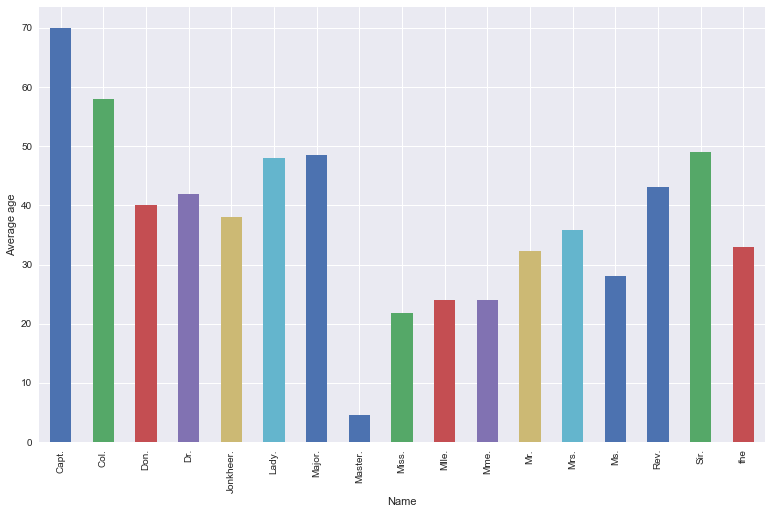

In [14]:
#-------------- Taking care of missing data  -----------------------------

print ('Number of null values in Age:', sum(X.Age.isnull()))
 

# -------- Change Name -> Title ----------------------------
got= df.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
# ---------------------------------------------------------- 


#------------------ Average Age per title -------------------------------------------------------------


ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

# Fill the missing Ages ---------------------------
n_traning= df.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
#--------------------------------------------------------------------    

X=X.drop(['Name'], axis=1)

 

In [15]:
X.head(20)

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,22.000000,0,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,0,0
4,3,1,35.000000,0,0
5,3,1,43.166667,0,1
6,1,1,54.000000,0,0
7,3,1,2.000000,0,0
8,3,0,27.000000,0,0
9,2,0,14.000000,1,0


make feature transformation. For example, we could transform the "Age" feature in order to simplify it. We could distinguish the youngsters (age less than 18 years) from the adults.

In [16]:

for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

In [17]:
X.head(50)

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0
5,3,1,0.0,0,1
6,1,1,0.0,0,0
7,3,1,1.0,0,0
8,3,0,0.0,0,0
9,2,0,1.0,1,0


In [18]:
# Test different classifiers
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Logistic Regression:
 Accuracy: 0.7834150493701055 +/- 0.026304984822902028 



In [19]:
#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

K-NN:
 Accuracy: 0.8103702757916242 +/- 0.03471820266605365 



In [20]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

SVM:
 Accuracy: 0.7878217568947907 +/- 0.030684614856384105 



In [21]:
#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")

Naive Bayes:
 Accuracy: 0.7734411531040746 +/- 0.02920215286221419 



In [22]:
#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())

Random Forest:
 Accuracy: 0.8114558506412439 +/- 0.032751546622810095


# As we can see, from all the 5 classifiers tested in this tutorial, Random Forest got better results.